In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf

In [2]:
# Import our input dataset
charity_df = pd.read_csv("charity_data.csv")
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


What variable(s) is/are target, features, removed?

Target: IS_SUCCESSFUL

Features: APPLICATION_TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, STATUS, INCOME_AMT, SPECIAL_CONSIDERATIONS(?), ASK_AMT  

Removed: EIN, NAME(?), 

In [3]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [4]:
charity_df[charity_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [5]:
# Drop NAME column
charity_df = charity_df.drop(['NAME'], axis=1)

In [6]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

# Bin APPLICATION_TYPE 

In [7]:
# Print out the APPLICATION_TYPE value counts
application_counts = charity_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Visualize the value counts
application_counts.plot.density()

In [9]:
# Determine which values to replace
replace_apps = list(application_counts[application_counts < 100].index)

# Replace in DataFrame
for applications in replace_apps:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(applications,"Other")
    
# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

# Bin CLASSIFICATION

In [10]:
# Print out the APPLICATION_TYPE value counts
classification_counts = charity_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2561        1
C8210        1
C4120        1
C1370        1
C2170        1
Name: CLASSIFICATION, Length: 71, dtype: int64

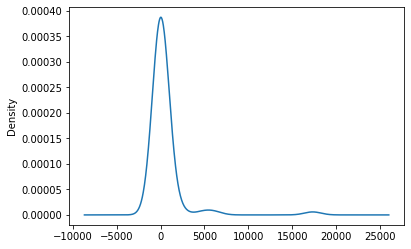

In [11]:
# Visualize the value counts
classification_counts.plot.density()

In [12]:
# Determine which values to replace
replace_class = list(classification_counts[classification_counts < 120].index)

# Replace in DataFrame
for classifications in replace_class:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classifications,"Other")
    
# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: CLASSIFICATION, dtype: int64

# Encode

In [13]:
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [14]:
charity_df[charity_cat].nunique()

APPLICATION_TYPE          10
AFFILIATION                6
CLASSIFICATION             9
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [15]:
charity_df.head()

,EIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat, 1)
charity_df.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10531628,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [22]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 392       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 443
Trainable params: 443
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [25]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True, 
    save_freq=1000)


In [33]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
  448/25724 [..............................] - ETA: 36s - loss: 0.6930 - accuracy: 0.5692 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1120/25724 [>.............................] - ETA: 17s - loss: 0.6719 - accuracy: 0.5857
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2080/25724 [=>............................] - ETA: 10s - loss: 0.6630 - accuracy: 0.5966
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3232/25724 [==>...........................] - ETA: 7s - loss: 0.6495 - accuracy: 0.6108
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4416/25724 [====>.........................] - ETA: 5s - loss: 0.6419 - accuracy: 0.6266
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5568/25724 [=====>........................] - ETA: 4s - loss: 0.6311 - accuracy: 0.6466
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6240/25724 [======>.......................] - ETA: 4s - loss: 0.6251 - accuracy: 0.6

 4256/25724 [===>..........................] - ETA: 2s - loss: 0.5625 - accuracy: 0.7251
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4736/25724 [====>.........................] - ETA: 2s - loss: 0.5596 - accuracy: 0.7287
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5920/25724 [=====>........................] - ETA: 2s - loss: 0.5551 - accuracy: 0.7314
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6816/25724 [======>.......................] - ETA: 2s - loss: 0.5542 - accuracy: 0.7330
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5552 - accuracy: 0.7335
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8736/25724 [=========>....................] - ETA: 1s - loss: 0.5574 - accuracy: 0.7317
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10336/25724 [===========>..................] - ETA: 1s - loss: 0.5590 - accuracy: 0.7299
Epoch 00003: saving model to checkp

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 8768/25724 [=========>....................] - ETA: 1s - loss: 0.5538 - accuracy: 0.7284
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9920/25724 [==========>...................] - ETA: 1s - loss: 0.5519 - accuracy: 0.7305
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10784/25724 [===========>..................] - ETA: 1s - loss: 0.5526 - accuracy: 0.7297
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12192/25724 [=============>................] - ETA: 1s - loss: 0.5523 - accuracy: 0.7313
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13248/25724 [==============>...............] - ETA: 1s - loss: 0.5501 - accuracy: 0.7333
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13792/25724 [===============>..............] - ETA: 1s - loss: 0.5500 - accuracy: 0.7327
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15040/25724 [================>.............] - ETA: 1s - loss: 0.54

12576/25724 [=============>................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7349
Epoch 00007: saving model to checkpoints/weights.07.hdf5
14016/25724 [===============>..............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7362
Epoch 00007: saving model to checkpoints/weights.07.hdf5
14464/25724 [===============>..............] - ETA: 1s - loss: 0.5450 - accuracy: 0.7347
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15968/25724 [=================>............] - ETA: 0s - loss: 0.5456 - accuracy: 0.7346
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5460 - accuracy: 0.7347
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17824/25724 [===================>..........] - ETA: 0s - loss: 0.5475 - accuracy: 0.7338
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19104/25724 [=====================>........] - ETA: 0s - loss: 0.5476 - accuracy: 0.7342
Epoch 00007: saving model to checkp

16352/25724 [==================>...........] - ETA: 1s - loss: 0.5469 - accuracy: 0.7339
Epoch 00009: saving model to checkpoints/weights.09.hdf5
17504/25724 [===================>..........] - ETA: 1s - loss: 0.5478 - accuracy: 0.7338
Epoch 00009: saving model to checkpoints/weights.09.hdf5
18752/25724 [====================>.........] - ETA: 1s - loss: 0.5468 - accuracy: 0.7350
Epoch 00009: saving model to checkpoints/weights.09.hdf5
19744/25724 [======================>.......] - ETA: 0s - loss: 0.5467 - accuracy: 0.7352
Epoch 00009: saving model to checkpoints/weights.09.hdf5
20832/25724 [=======================>......] - ETA: 0s - loss: 0.5466 - accuracy: 0.7357
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21728/25724 [========================>.....] - ETA: 0s - loss: 0.5471 - accuracy: 0.7352
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 0.5468 - accuracy: 0.7352
Epoch 00009: saving model to checkp

20992/25724 [=======================>......] - ETA: 0s - loss: 0.5489 - accuracy: 0.7314
Epoch 00011: saving model to checkpoints/weights.11.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5488 - accuracy: 0.7316
Epoch 00011: saving model to checkpoints/weights.11.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.5490 - accuracy: 0.7316
Epoch 00011: saving model to checkpoints/weights.11.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.5478 - accuracy: 0.7330
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 3s 129us/sample - loss: 0.5462 - accuracy: 0.7339
Epoch 12/100
   32/25724 [..............................] - ETA: 5s - loss: 0.4844 - accuracy: 0.7812
Epoch 00012: saving model to checkpoints/weights.12.hdf5
  960/25724 [>.............................] - ETA: 7s - loss: 0.5415 - accuracy: 0.7271
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1920/25724 [=

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25724/25724 [==============================] - 3s 116us/sample - loss: 0.5458 - accuracy: 0.7348
Epoch 14/100
  416/25724 [..............................] - ETA: 3s - loss: 0.5339 - accuracy: 0.7428
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 1824/25724 [=>............................] - ETA: 3s - loss: 0.5525 - accuracy: 0.7319
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2528/25724 [=>............................] - ETA: 3s - loss: 0.5530 - accuracy: 0.7263
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3520/25724 [===>..........................] - ETA: 3s - loss: 0.5429 - accuracy: 0.7352
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4544/25724 [====>.........................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7359
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5408/25724 [=====>........................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7315
Epoch 00014: s

 3328/25724 [==>...........................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7335
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4288/25724 [====>.........................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7339
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5472/25724 [=====>........................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7359
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 6752/25724 [======>.......................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7370
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7392
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8704/25724 [=========>....................] - ETA: 1s - loss: 0.5434 - accuracy: 0.7369
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9280/25724 [=========>....................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7351
Epoch 00016: saving model to checkp

 7808/25724 [========>.....................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7337
Epoch 00018: saving model to checkpoints/weights.18.hdf5
 9312/25724 [=========>....................] - ETA: 1s - loss: 0.5486 - accuracy: 0.7326
Epoch 00018: saving model to checkpoints/weights.18.hdf5
10176/25724 [==========>...................] - ETA: 1s - loss: 0.5473 - accuracy: 0.7341
Epoch 00018: saving model to checkpoints/weights.18.hdf5
11168/25724 [============>.................] - ETA: 1s - loss: 0.5488 - accuracy: 0.7325
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12160/25724 [=============>................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7331
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13472/25724 [==============>...............] - ETA: 1s - loss: 0.5468 - accuracy: 0.7352
Epoch 00018: saving model to checkpoints/weights.18.hdf5
14592/25724 [================>.............] - ETA: 1s - loss: 0.5461 - accuracy: 0.7354
Epoch 00018: saving model to checkp

13216/25724 [==============>...............] - ETA: 1s - loss: 0.5441 - accuracy: 0.7370
Epoch 00020: saving model to checkpoints/weights.20.hdf5
14176/25724 [===============>..............] - ETA: 1s - loss: 0.5455 - accuracy: 0.7356
Epoch 00020: saving model to checkpoints/weights.20.hdf5
15200/25724 [================>.............] - ETA: 1s - loss: 0.5458 - accuracy: 0.7353
Epoch 00020: saving model to checkpoints/weights.20.hdf5
15776/25724 [=================>............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7366
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17056/25724 [==================>...........] - ETA: 0s - loss: 0.5443 - accuracy: 0.7359
Epoch 00020: saving model to checkpoints/weights.20.hdf5
18272/25724 [====================>.........] - ETA: 0s - loss: 0.5446 - accuracy: 0.7357
Epoch 00020: saving model to checkpoints/weights.20.hdf5
19360/25724 [=====================>........] - ETA: 0s - loss: 0.5452 - accuracy: 0.7352
Epoch 00020: saving model to checkp

18112/25724 [====================>.........] - ETA: 0s - loss: 0.5434 - accuracy: 0.7344
Epoch 00022: saving model to checkpoints/weights.22.hdf5
19136/25724 [=====================>........] - ETA: 0s - loss: 0.5427 - accuracy: 0.7350
Epoch 00022: saving model to checkpoints/weights.22.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.5438 - accuracy: 0.7342
Epoch 00022: saving model to checkpoints/weights.22.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.5449 - accuracy: 0.7336
Epoch 00022: saving model to checkpoints/weights.22.hdf5
21952/25724 [========================>.....] - ETA: 0s - loss: 0.5454 - accuracy: 0.7333
Epoch 00022: saving model to checkpoints/weights.22.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 0.5456 - accuracy: 0.7333
Epoch 00022: saving model to checkpoints/weights.22.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5457 - accuracy: 0.7332
Epoch 00022: saving model to checkp

Epoch 00024: saving model to checkpoints/weights.24.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5443 - accuracy: 0.7328
Epoch 00024: saving model to checkpoints/weights.24.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.5444 - accuracy: 0.7329
Epoch 00024: saving model to checkpoints/weights.24.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5441 - accuracy: 0.7333
Epoch 00024: saving model to checkpoints/weights.24.hdf5
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5434 - accuracy: 0.7340
Epoch 25/100
   32/25724 [..............................] - ETA: 5s - loss: 0.5944 - accuracy: 0.7500
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1280/25724 [>.............................] - ETA: 2s - loss: 0.5500 - accuracy: 0.7219
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2240/25724 [=>............................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7330
Epoch 00025: sa

   32/25724 [..............................] - ETA: 6s - loss: 0.5414 - accuracy: 0.7812
Epoch 00027: saving model to checkpoints/weights.27.hdf5
  768/25724 [..............................] - ETA: 3s - loss: 0.5547 - accuracy: 0.7253
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 2080/25724 [=>............................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7264
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 2688/25724 [==>...........................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7269
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 4256/25724 [===>..........................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7312
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5248/25724 [=====>........................] - ETA: 2s - loss: 0.5490 - accuracy: 0.7285
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5760/25724 [=====>........................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7292
Epoch 00027: saving model to checkp

 4064/25724 [===>..........................] - ETA: 1s - loss: 0.5486 - accuracy: 0.7315
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 5088/25724 [====>.........................] - ETA: 1s - loss: 0.5496 - accuracy: 0.7313
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 5696/25724 [=====>........................] - ETA: 1s - loss: 0.5482 - accuracy: 0.7312
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 6688/25724 [======>.......................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7321
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 7872/25724 [========>.....................] - ETA: 1s - loss: 0.5467 - accuracy: 0.7313
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 9184/25724 [=========>....................] - ETA: 1s - loss: 0.5453 - accuracy: 0.7329
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 9664/25724 [==========>...................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7344
Epoch 00029: saving model to checkp

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 8928/25724 [=========>....................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7348
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 9440/25724 [==========>...................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7333
Epoch 00031: saving model to checkpoints/weights.31.hdf5
10624/25724 [===========>..................] - ETA: 1s - loss: 0.5430 - accuracy: 0.7339
Epoch 00031: saving model to checkpoints/weights.31.hdf5
11648/25724 [============>.................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7366
Epoch 00031: saving model to checkpoints/weights.31.hdf5
12608/25724 [=============>................] - ETA: 1s - loss: 0.5409 - accuracy: 0.7365
Epoch 00031: saving model to checkpoints/weights.31.hdf5
13728/25724 [===============>..............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7370
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15072/25724 [================>.............] - ETA: 1s - loss: 0.53

12288/25724 [=============>................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7380
Epoch 00033: saving model to checkpoints/weights.33.hdf5
13568/25724 [==============>...............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7385
Epoch 00033: saving model to checkpoints/weights.33.hdf5
14208/25724 [===============>..............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7373
Epoch 00033: saving model to checkpoints/weights.33.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5387 - accuracy: 0.7382
Epoch 00033: saving model to checkpoints/weights.33.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5390 - accuracy: 0.7383
Epoch 00033: saving model to checkpoints/weights.33.hdf5
17760/25724 [===================>..........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7385
Epoch 00033: saving model to checkpoints/weights.33.hdf5
18912/25724 [=====================>........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7393
Epoch 00033: saving model to checkp

16608/25724 [==================>...........] - ETA: 0s - loss: 0.5447 - accuracy: 0.7322
Epoch 00035: saving model to checkpoints/weights.35.hdf5
17120/25724 [==================>...........] - ETA: 0s - loss: 0.5442 - accuracy: 0.7331
Epoch 00035: saving model to checkpoints/weights.35.hdf5
18240/25724 [====================>.........] - ETA: 0s - loss: 0.5436 - accuracy: 0.7332
Epoch 00035: saving model to checkpoints/weights.35.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5436 - accuracy: 0.7335
Epoch 00035: saving model to checkpoints/weights.35.hdf5
20448/25724 [======================>.......] - ETA: 0s - loss: 0.5442 - accuracy: 0.7330
Epoch 00035: saving model to checkpoints/weights.35.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 0.5433 - accuracy: 0.7337
Epoch 00035: saving model to checkpoints/weights.35.hdf5
22592/25724 [=========================>....] - ETA: 0s - loss: 0.5431 - accuracy: 0.7338
Epoch 00035: saving model to checkp

20288/25724 [======================>.......] - ETA: 0s - loss: 0.5427 - accuracy: 0.7347
Epoch 00037: saving model to checkpoints/weights.37.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5421 - accuracy: 0.7349
Epoch 00037: saving model to checkpoints/weights.37.hdf5
22112/25724 [========================>.....] - ETA: 0s - loss: 0.5419 - accuracy: 0.7353
Epoch 00037: saving model to checkpoints/weights.37.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5412 - accuracy: 0.7356
Epoch 00037: saving model to checkpoints/weights.37.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5410 - accuracy: 0.7359
Epoch 00037: saving model to checkpoints/weights.37.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.7347
Epoch 00037: saving model to checkpoints/weights.37.hdf5
25724/25724 [==============================] - 3s 99us/sample - loss: 0.5416 - accuracy: 0.7354
Epoch 38/100
  384/25724 [..

Epoch 00039: saving model to checkpoints/weights.39.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.5418 - accuracy: 0.7348
Epoch 00039: saving model to checkpoints/weights.39.hdf5
25724/25724 [==============================] - 3s 99us/sample - loss: 0.5411 - accuracy: 0.7349
Epoch 40/100
  544/25724 [..............................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7243
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 1600/25724 [>.............................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7262
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 2144/25724 [=>............................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7276
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 3520/25724 [===>..........................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7222
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 4224/25724 [===>..........................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7263
Epoch 00040: sa

 1952/25724 [=>............................] - ETA: 2s - loss: 0.5246 - accuracy: 0.7485
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 3200/25724 [==>...........................] - ETA: 2s - loss: 0.5275 - accuracy: 0.7475
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 3744/25724 [===>..........................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7463
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 5248/25724 [=====>........................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7473
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 6272/25724 [======>.......................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7460
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 7456/25724 [=======>......................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7436
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 8512/25724 [========>.....................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7430
Epoch 00042: saving model to checkp

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7351
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 7872/25724 [========>.....................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7360
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 9248/25724 [=========>....................] - ETA: 1s - loss: 0.5422 - accuracy: 0.7373
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 9888/25724 [==========>...................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7374
Epoch 00044: saving model to checkpoints/weights.44.hdf5
10944/25724 [===========>..................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7377
Epoch 00044: saving model to checkpoints/weights.44.hdf5
12032/25724 [=============>................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7385
Epoch 00044: saving model to checkpoints/weights.44.hdf5
12992/25724 [==============>...............] - ETA: 1s - loss: 0.54

10912/25724 [===========>..................] - ETA: 1s - loss: 0.5430 - accuracy: 0.7338
Epoch 00046: saving model to checkpoints/weights.46.hdf5
11456/25724 [============>.................] - ETA: 1s - loss: 0.5451 - accuracy: 0.7325
Epoch 00046: saving model to checkpoints/weights.46.hdf5
13024/25724 [==============>...............] - ETA: 1s - loss: 0.5453 - accuracy: 0.7324
Epoch 00046: saving model to checkpoints/weights.46.hdf5
14112/25724 [===============>..............] - ETA: 1s - loss: 0.5442 - accuracy: 0.7339
Epoch 00046: saving model to checkpoints/weights.46.hdf5
14656/25724 [================>.............] - ETA: 1s - loss: 0.5428 - accuracy: 0.7351
Epoch 00046: saving model to checkpoints/weights.46.hdf5
15840/25724 [=================>............] - ETA: 0s - loss: 0.5415 - accuracy: 0.7353
Epoch 00046: saving model to checkpoints/weights.46.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 0.5418 - accuracy: 0.7345
Epoch 00046: saving model to checkp

Epoch 00048: saving model to checkpoints/weights.48.hdf5
15872/25724 [=================>............] - ETA: 0s - loss: 0.5401 - accuracy: 0.7350
Epoch 00048: saving model to checkpoints/weights.48.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5398 - accuracy: 0.7354
Epoch 00048: saving model to checkpoints/weights.48.hdf5
17856/25724 [===================>..........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7349
Epoch 00048: saving model to checkpoints/weights.48.hdf5
19040/25724 [=====================>........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7348
Epoch 00048: saving model to checkpoints/weights.48.hdf5
19648/25724 [=====================>........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7345
Epoch 00048: saving model to checkpoints/weights.48.hdf5
20640/25724 [=======================>......] - ETA: 0s - loss: 0.5390 - accuracy: 0.7361
Epoch 00048: saving model to checkpoints/weights.48.hdf5
21792/25724 [========================>.....] - ETA: 0s - loss: 0.53

19552/25724 [=====================>........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7358
Epoch 00050: saving model to checkpoints/weights.50.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7367
Epoch 00050: saving model to checkpoints/weights.50.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.5392 - accuracy: 0.7373
Epoch 00050: saving model to checkpoints/weights.50.hdf5
22432/25724 [=========================>....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7378
Epoch 00050: saving model to checkpoints/weights.50.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5397 - accuracy: 0.7369
Epoch 00050: saving model to checkpoints/weights.50.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7364
Epoch 00050: saving model to checkpoints/weights.50.hdf5
25724/25724 [==============================] - 2s 97us/sample - loss: 0.5405 - accuracy: 0.7359
Epoch 51/100
   32/25724 [..

24000/25724 [==========================>...] - ETA: 0s - loss: 0.5409 - accuracy: 0.7358
Epoch 00052: saving model to checkpoints/weights.52.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 0.5405 - accuracy: 0.7361
Epoch 00052: saving model to checkpoints/weights.52.hdf5
25724/25724 [==============================] - 3s 103us/sample - loss: 0.5402 - accuracy: 0.7360
Epoch 53/100
  448/25724 [..............................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7545
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 1824/25724 [=>............................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7462
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 2592/25724 [==>...........................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7361
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 3840/25724 [===>..........................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7385
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 4992/25724 [=

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 2400/25724 [=>............................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7371
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 3552/25724 [===>..........................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7376
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 4704/25724 [====>.........................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7411
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 5824/25724 [=====>........................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7399
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 6816/25724 [======>.......................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7383
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 7616/25724 [=======>......................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7403
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 8768/25724 [=========>....................] - ETA: 1s - loss: 0.53

 6304/25724 [======>.......................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7406
Epoch 00057: saving model to checkpoints/weights.57.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7411
Epoch 00057: saving model to checkpoints/weights.57.hdf5
 8192/25724 [========>.....................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7419
Epoch 00057: saving model to checkpoints/weights.57.hdf5
 9472/25724 [==========>...................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7410
Epoch 00057: saving model to checkpoints/weights.57.hdf5
10144/25724 [==========>...................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7398
Epoch 00057: saving model to checkpoints/weights.57.hdf5
11648/25724 [============>.................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7413
Epoch 00057: saving model to checkpoints/weights.57.hdf5
12352/25724 [=============>................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7409
Epoch 00057: saving model to checkp

11296/25724 [============>.................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7380
Epoch 00059: saving model to checkpoints/weights.59.hdf5
12032/25724 [=============>................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7356
Epoch 00059: saving model to checkpoints/weights.59.hdf5
13152/25724 [==============>...............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7381
Epoch 00059: saving model to checkpoints/weights.59.hdf5
14240/25724 [===============>..............] - ETA: 1s - loss: 0.5363 - accuracy: 0.7374
Epoch 00059: saving model to checkpoints/weights.59.hdf5
15424/25724 [================>.............] - ETA: 0s - loss: 0.5371 - accuracy: 0.7363
Epoch 00059: saving model to checkpoints/weights.59.hdf5
16576/25724 [==================>...........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7359
Epoch 00059: saving model to checkpoints/weights.59.hdf5
17216/25724 [===================>..........] - ETA: 0s - loss: 0.5383 - accuracy: 0.7363
Epoch 00059: saving model to checkp

Epoch 00061: saving model to checkpoints/weights.61.hdf5
15904/25724 [=================>............] - ETA: 0s - loss: 0.5398 - accuracy: 0.7360
Epoch 00061: saving model to checkpoints/weights.61.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7356
Epoch 00061: saving model to checkpoints/weights.61.hdf5
18400/25724 [====================>.........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7359
Epoch 00061: saving model to checkpoints/weights.61.hdf5
18848/25724 [====================>.........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7350
Epoch 00061: saving model to checkpoints/weights.61.hdf5
20000/25724 [======================>.......] - ETA: 0s - loss: 0.5392 - accuracy: 0.7352
Epoch 00061: saving model to checkpoints/weights.61.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.5395 - accuracy: 0.7352
Epoch 00061: saving model to checkpoints/weights.61.hdf5
21952/25724 [========================>.....] - ETA: 0s - loss: 0.53

20096/25724 [======================>.......] - ETA: 0s - loss: 0.5394 - accuracy: 0.7359
Epoch 00063: saving model to checkpoints/weights.63.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5395 - accuracy: 0.7358
Epoch 00063: saving model to checkpoints/weights.63.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5377 - accuracy: 0.7371
Epoch 00063: saving model to checkpoints/weights.63.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5377 - accuracy: 0.7374
Epoch 00063: saving model to checkpoints/weights.63.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.5380 - accuracy: 0.7376
Epoch 00063: saving model to checkpoints/weights.63.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.5390 - accuracy: 0.7368
Epoch 00063: saving model to checkpoints/weights.63.hdf5
25724/25724 [==============================] - 3s 120us/sample - loss: 0.5396 - accuracy: 0.7360
Epoch 64/100
   32/25724 [.

23616/25724 [==========================>...] - ETA: 0s - loss: 0.5392 - accuracy: 0.7370
Epoch 00065: saving model to checkpoints/weights.65.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5402 - accuracy: 0.7359
Epoch 00065: saving model to checkpoints/weights.65.hdf5
25724/25724 [==============================] - 3s 105us/sample - loss: 0.5396 - accuracy: 0.7363
Epoch 66/100
   32/25724 [..............................] - ETA: 3s - loss: 0.7269 - accuracy: 0.5312
Epoch 00066: saving model to checkpoints/weights.66.hdf5
  960/25724 [>.............................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7312
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 1984/25724 [=>............................] - ETA: 2s - loss: 0.5517 - accuracy: 0.7193
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 2976/25724 [==>...........................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7208
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 4192/25724 [=

 1824/25724 [=>............................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7412
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 2816/25724 [==>...........................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7397
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 3744/25724 [===>..........................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7340
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 4704/25724 [====>.........................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7349
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 5632/25724 [=====>........................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7358
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 7072/25724 [=======>......................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7360
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 8128/25724 [========>.....................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7360
Epoch 00068: saving model to checkp

 6464/25724 [======>.......................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7347
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 7968/25724 [========>.....................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7351
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 8928/25724 [=========>....................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7342
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 9856/25724 [==========>...................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7340
Epoch 00070: saving model to checkpoints/weights.70.hdf5
10592/25724 [===========>..................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7340
Epoch 00070: saving model to checkpoints/weights.70.hdf5
11776/25724 [============>.................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7345
Epoch 00070: saving model to checkpoints/weights.70.hdf5
12416/25724 [=============>................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7360
Epoch 00070: saving model to checkp

11872/25724 [============>.................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7380
Epoch 00072: saving model to checkpoints/weights.72.hdf5
12896/25724 [==============>...............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7392
Epoch 00072: saving model to checkpoints/weights.72.hdf5
13504/25724 [==============>...............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7395
Epoch 00072: saving model to checkpoints/weights.72.hdf5
14528/25724 [===============>..............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7392
Epoch 00072: saving model to checkpoints/weights.72.hdf5
15584/25724 [=================>............] - ETA: 1s - loss: 0.5398 - accuracy: 0.7392
Epoch 00072: saving model to checkpoints/weights.72.hdf5
16416/25724 [==================>...........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7378
Epoch 00072: saving model to checkpoints/weights.72.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5398 - accuracy: 0.7385
Epoch 00072: saving model to checkp

Epoch 00074: saving model to checkpoints/weights.74.hdf5
16320/25724 [==================>...........] - ETA: 1s - loss: 0.5404 - accuracy: 0.7357
Epoch 00074: saving model to checkpoints/weights.74.hdf5
17376/25724 [===================>..........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7364
Epoch 00074: saving model to checkpoints/weights.74.hdf5
18496/25724 [====================>.........] - ETA: 0s - loss: 0.5397 - accuracy: 0.7357
Epoch 00074: saving model to checkpoints/weights.74.hdf5
19648/25724 [=====================>........] - ETA: 0s - loss: 0.5411 - accuracy: 0.7350
Epoch 00074: saving model to checkpoints/weights.74.hdf5
20288/25724 [======================>.......] - ETA: 0s - loss: 0.5409 - accuracy: 0.7353
Epoch 00074: saving model to checkpoints/weights.74.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 0.5412 - accuracy: 0.7357
Epoch 00074: saving model to checkpoints/weights.74.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.54

20512/25724 [======================>.......] - ETA: 0s - loss: 0.5405 - accuracy: 0.7348
Epoch 00076: saving model to checkpoints/weights.76.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7356
Epoch 00076: saving model to checkpoints/weights.76.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5391 - accuracy: 0.7359
Epoch 00076: saving model to checkpoints/weights.76.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5394 - accuracy: 0.7358
Epoch 00076: saving model to checkpoints/weights.76.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5396 - accuracy: 0.7360
Epoch 00076: saving model to checkpoints/weights.76.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.5386 - accuracy: 0.7369
Epoch 00076: saving model to checkpoints/weights.76.hdf5
25724/25724 [==============================] - 3s 102us/sample - loss: 0.5388 - accuracy: 0.7369
Epoch 77/100
  544/25724 [.

25216/25724 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7372
Epoch 00078: saving model to checkpoints/weights.78.hdf5
25724/25724 [==============================] - 3s 114us/sample - loss: 0.5390 - accuracy: 0.7365
Epoch 79/100
  512/25724 [..............................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7383
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 1696/25724 [>.............................] - ETA: 2s - loss: 0.5516 - accuracy: 0.7335
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 2688/25724 [==>...........................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7385
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 3232/25724 [==>...........................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7355
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 4384/25724 [====>.........................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7365
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 5504/25724 [=

 3136/25724 [==>...........................] - ETA: 3s - loss: 0.5292 - accuracy: 0.7408
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 4096/25724 [===>..........................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7417
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 5376/25724 [=====>........................] - ETA: 2s - loss: 0.5283 - accuracy: 0.7411
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 6240/25724 [======>.......................] - ETA: 2s - loss: 0.5268 - accuracy: 0.7441
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 7264/25724 [=======>......................] - ETA: 2s - loss: 0.5262 - accuracy: 0.7449
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 8608/25724 [=========>....................] - ETA: 1s - loss: 0.5301 - accuracy: 0.7420
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 9184/25724 [=========>....................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7389
Epoch 00081: saving model to checkp

 8224/25724 [========>.....................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7332
Epoch 00083: saving model to checkpoints/weights.83.hdf5
 8768/25724 [=========>....................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7341
Epoch 00083: saving model to checkpoints/weights.83.hdf5
10304/25724 [===========>..................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7336
Epoch 00083: saving model to checkpoints/weights.83.hdf5
11488/25724 [============>.................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7345
Epoch 00083: saving model to checkpoints/weights.83.hdf5
12512/25724 [=============>................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7356
Epoch 00083: saving model to checkpoints/weights.83.hdf5
13056/25724 [==============>...............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7360
Epoch 00083: saving model to checkpoints/weights.83.hdf5
14048/25724 [===============>..............] - ETA: 1s - loss: 0.5405 - accuracy: 0.7353
Epoch 00083: saving model to checkp

11840/25724 [============>.................] - ETA: 1s - loss: 0.5316 - accuracy: 0.74 - ETA: 1s - loss: 0.5331 - accuracy: 0.7401
Epoch 00085: saving model to checkpoints/weights.85.hdf5
12896/25724 [==============>...............] - ETA: 1s - loss: 0.5355 - accuracy: 0.7375
Epoch 00085: saving model to checkpoints/weights.85.hdf5
14016/25724 [===============>..............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7368
Epoch 00085: saving model to checkpoints/weights.85.hdf5
14880/25724 [================>.............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7356
Epoch 00085: saving model to checkpoints/weights.85.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5376 - accuracy: 0.7360
Epoch 00085: saving model to checkpoints/weights.85.hdf5
16704/25724 [==================>...........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7359
Epoch 00085: saving model to checkpoints/weights.85.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.5375 - accuracy: 

15968/25724 [=================>............] - ETA: 1s - loss: 0.5363 - accuracy: 0.7387
Epoch 00087: saving model to checkpoints/weights.87.hdf5
16608/25724 [==================>...........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7383
Epoch 00087: saving model to checkpoints/weights.87.hdf5
17568/25724 [===================>..........] - ETA: 1s - loss: 0.5356 - accuracy: 0.7396
Epoch 00087: saving model to checkpoints/weights.87.hdf5
18848/25724 [====================>.........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7368
Epoch 00087: saving model to checkpoints/weights.87.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.5378 - accuracy: 0.7372
Epoch 00087: saving model to checkpoints/weights.87.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.5380 - accuracy: 0.7370
Epoch 00087: saving model to checkpoints/weights.87.hdf5
21984/25724 [========================>.....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7368
Epoch 00087: saving model to checkp

19904/25724 [======================>.......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7382
Epoch 00089: saving model to checkpoints/weights.89.hdf5
20704/25724 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7378
Epoch 00089: saving model to checkpoints/weights.89.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7376
Epoch 00089: saving model to checkpoints/weights.89.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7376
Epoch 00089: saving model to checkpoints/weights.89.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.5375 - accuracy: 0.7374
Epoch 00089: saving model to checkpoints/weights.89.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7375
Epoch 00089: saving model to checkpoints/weights.89.hdf5
25724/25724 [==============================] - 3s 116us/sample - loss: 0.5381 - accuracy: 0.7373
Epoch 90/100
   32/25724 [.

24640/25724 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7367
Epoch 00091: saving model to checkpoints/weights.91.hdf5
25724/25724 [==============================] - 3s 107us/sample - loss: 0.5381 - accuracy: 0.7373
Epoch 92/100
   32/25724 [..............................] - ETA: 2s - loss: 0.5551 - accuracy: 0.7812
Epoch 00092: saving model to checkpoints/weights.92.hdf5
  800/25724 [..............................] - ETA: 3s - loss: 0.5452 - accuracy: 0.7300
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 1632/25724 [>.............................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7359
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 2976/25724 [==>...........................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7339
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 3520/25724 [===>..........................] - ETA: 2s - loss: 0.5401 - accuracy: 0.7349
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 5024/25724 [=

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 2432/25724 [=>............................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7270
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 3616/25724 [===>..........................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7284
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 4736/25724 [====>.........................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7308
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 5632/25724 [=====>........................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7317
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 6688/25724 [======>.......................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7359
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 7744/25724 [========>.....................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7375
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 8384/25724 [========>.....................] - ETA: 1s - loss: 0.53

 6464/25724 [======>.......................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7373
Epoch 00096: saving model to checkpoints/weights.96.hdf5
 7584/25724 [=======>......................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7368
Epoch 00096: saving model to checkpoints/weights.96.hdf5
 8544/25724 [========>.....................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7393
Epoch 00096: saving model to checkpoints/weights.96.hdf5
 9632/25724 [==========>...................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7408 ETA: 1s - loss: 0.5340 - accuracy: 0.74
Epoch 00096: saving model to checkpoints/weights.96.hdf5
10496/25724 [===========>..................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7419
Epoch 00096: saving model to checkpoints/weights.96.hdf5
11584/25724 [============>.................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7394
Epoch 00096: saving model to checkpoints/weights.96.hdf5
12576/25724 [=============>................] - ETA: 1s - loss: 0.5352 - accuracy: 0.

10272/25724 [==========>...................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7387
Epoch 00098: saving model to checkpoints/weights.98.hdf5
11232/25724 [============>.................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7374
Epoch 00098: saving model to checkpoints/weights.98.hdf5
12224/25724 [=============>................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7369
Epoch 00098: saving model to checkpoints/weights.98.hdf5
13568/25724 [==============>...............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7373
Epoch 00098: saving model to checkpoints/weights.98.hdf5
14400/25724 [===============>..............] - ETA: 1s - loss: 0.5395 - accuracy: 0.7371
Epoch 00098: saving model to checkpoints/weights.98.hdf5
15296/25724 [================>.............] - ETA: 1s - loss: 0.5397 - accuracy: 0.7365
Epoch 00098: saving model to checkpoints/weights.98.hdf5
16256/25724 [=================>............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7373
Epoch 00098: saving model to checkp

14400/25724 [===============>..............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7401
Epoch 00100: saving model to checkpoints/weights.100.hdf5
15264/25724 [================>.............] - ETA: 1s - loss: 0.5352 - accuracy: 0.7400
Epoch 00100: saving model to checkpoints/weights.100.hdf5
16288/25724 [=================>............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7405
Epoch 00100: saving model to checkpoints/weights.100.hdf5
17056/25724 [==================>...........] - ETA: 0s - loss: 0.5355 - accuracy: 0.7394
Epoch 00100: saving model to checkpoints/weights.100.hdf5
18272/25724 [====================>.........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7382
Epoch 00100: saving model to checkpoints/weights.100.hdf5
18784/25724 [====================>.........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7389
Epoch 00100: saving model to checkpoints/weights.100.hdf5
20384/25724 [======================>.......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7377
Epoch 00100: saving model to 

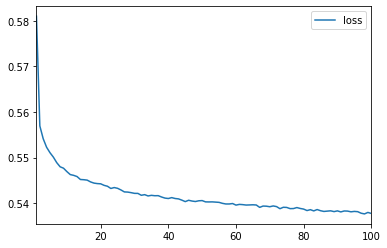

In [35]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

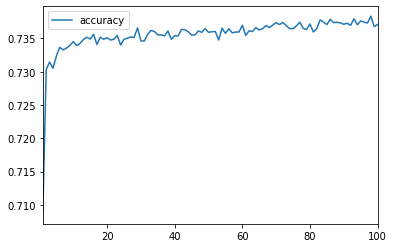

In [38]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5522 - accuracy: 0.7271
Loss: 0.5517900275836533, Accuracy: 0.7271137237548828


Second try using hidden nodes ~3x input features, shorten to 20 epochs as earlier model approached accuracy after 15-20 epochs.  

In [39]:
len(X_train[0])

48

In [50]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1a = 150
hidden_nodes_layer2a = 150

nna = tf.keras.models.Sequential()

# First hidden layer
nna.add(tf.keras.layers.Dense(units=hidden_nodes_layer1a, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nna.add(tf.keras.layers.Dense(units=hidden_nodes_layer2a, activation="relu"))

# Output layer
nna.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nna.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 150)               7350      
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 151       
Total params: 30,151
Trainable params: 30,151
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
nna.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# Train the model
fit_model_a = nna.fit(X_train_scaled, y_train, epochs=20, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/20
  992/25724 [>.............................] - ETA: 4s - loss: 0.5039 - accuracy: 0.7520
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1888/25724 [=>............................] - ETA: 3s - loss: 0.5003 - accuracy: 0.7526
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3040/25724 [==>...........................] - ETA: 3s - loss: 0.5001 - accuracy: 0.7553
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3712/25724 [===>..........................] - ETA: 3s - loss: 0.5032 - accuracy: 0.7527
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4928/25724 [====>.........................] - ETA: 3s - loss: 0.4990 - accuracy: 0.7547
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6016/25724 [======>.......................] - ETA: 2s - loss: 0.5002 - accuracy: 0.7553
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7072/25724 [=======>......................] - ETA: 2s - loss: 0.5009 - accuracy: 0.7551
E

 4448/25724 [====>.........................] - ETA: 2s - loss: 0.4982 - accuracy: 0.7570
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5472/25724 [=====>........................] - ETA: 2s - loss: 0.4979 - accuracy: 0.7564
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6464/25724 [======>.......................] - ETA: 2s - loss: 0.4988 - accuracy: 0.7573
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7488/25724 [=======>......................] - ETA: 2s - loss: 0.4997 - accuracy: 0.7567
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8480/25724 [========>.....................] - ETA: 2s - loss: 0.4994 - accuracy: 0.7583
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9536/25724 [==========>...................] - ETA: 1s - loss: 0.4981 - accuracy: 0.7589
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10560/25724 [===========>..................] - ETA: 1s - loss: 0.4977 - accuracy: 0.7598
Epoch 00003: saving model to checkp

 8320/25724 [========>.....................] - ETA: 2s - loss: 0.4964 - accuracy: 0.7576
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9504/25724 [==========>...................] - ETA: 2s - loss: 0.4942 - accuracy: 0.7585
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10240/25724 [==========>...................] - ETA: 2s - loss: 0.4947 - accuracy: 0.7587
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11264/25724 [============>.................] - ETA: 2s - loss: 0.4952 - accuracy: 0.7591
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12736/25724 [=============>................] - ETA: 1s - loss: 0.4968 - accuracy: 0.7590
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13792/25724 [===============>..............] - ETA: 1s - loss: 0.4981 - accuracy: 0.7583
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14688/25724 [================>.............] - ETA: 1s - loss: 0.4993 - accuracy: 0.7578
Epoch 00005: saving model to checkp

Epoch 00007: saving model to checkpoints/weights.07.hdf5
13184/25724 [==============>...............] - ETA: 1s - loss: 0.5035 - accuracy: 0.7546
Epoch 00007: saving model to checkpoints/weights.07.hdf5
14464/25724 [===============>..............] - ETA: 1s - loss: 0.5007 - accuracy: 0.7570
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15168/25724 [================>.............] - ETA: 1s - loss: 0.4993 - accuracy: 0.7580
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16448/25724 [==================>...........] - ETA: 1s - loss: 0.5000 - accuracy: 0.7576
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17568/25724 [===================>..........] - ETA: 1s - loss: 0.4993 - accuracy: 0.7579
Epoch 00007: saving model to checkpoints/weights.07.hdf5
18464/25724 [====================>.........] - ETA: 1s - loss: 0.5004 - accuracy: 0.7571
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19616/25724 [=====================>........] - ETA: 0s - loss: 0.50

17184/25724 [===================>..........] - ETA: 1s - loss: 0.5001 - accuracy: 0.7580
Epoch 00009: saving model to checkpoints/weights.09.hdf5
17984/25724 [===================>..........] - ETA: 1s - loss: 0.5001 - accuracy: 0.7583
Epoch 00009: saving model to checkpoints/weights.09.hdf5
19360/25724 [=====================>........] - ETA: 0s - loss: 0.4996 - accuracy: 0.7586
Epoch 00009: saving model to checkpoints/weights.09.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5002 - accuracy: 0.7581
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21312/25724 [=======================>......] - ETA: 0s - loss: 0.5011 - accuracy: 0.7566
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22464/25724 [=========================>....] - ETA: 0s - loss: 0.5007 - accuracy: 0.7565
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.5009 - accuracy: 0.7572
Epoch 00009: saving model to checkp

Epoch 00011: saving model to checkpoints/weights.11.hdf5
21984/25724 [========================>.....] - ETA: 0s - loss: 0.5015 - accuracy: 0.7539
Epoch 00011: saving model to checkpoints/weights.11.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.5007 - accuracy: 0.7546
Epoch 00011: saving model to checkpoints/weights.11.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5001 - accuracy: 0.7555
Epoch 00011: saving model to checkpoints/weights.11.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.5001 - accuracy: 0.7557
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 4s 155us/sample - loss: 0.5003 - accuracy: 0.7561
Epoch 12/20
  608/25724 [..............................] - ETA: 4s - loss: 0.4634 - accuracy: 0.7714
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1536/25724 [>.............................] - ETA: 5s - loss: 0.4963 - accuracy: 0.7461
Epoch 00012: sa

25724/25724 [==============================] - 4s 150us/sample - loss: 0.5014 - accuracy: 0.7570
Epoch 14/20
   32/25724 [..............................] - ETA: 4s - loss: 0.5513 - accuracy: 0.6562
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 1248/25724 [>.............................] - ETA: 3s - loss: 0.4881 - accuracy: 0.7540
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2144/25724 [=>............................] - ETA: 5s - loss: 0.5058 - accuracy: 0.7421
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3264/25724 [==>...........................] - ETA: 4s - loss: 0.5048 - accuracy: 0.7515
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4448/25724 [====>.........................] - ETA: 3s - loss: 0.5085 - accuracy: 0.7482
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5248/25724 [=====>........................] - ETA: 3s - loss: 0.5033 - accuracy: 0.7542
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6496/25724 [==

 3808/25724 [===>..........................] - ETA: 3s - loss: 0.4856 - accuracy: 0.7676
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4896/25724 [====>.........................] - ETA: 3s - loss: 0.4913 - accuracy: 0.7645
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5984/25724 [=====>........................] - ETA: 3s - loss: 0.4913 - accuracy: 0.76 - ETA: 3s - loss: 0.4949 - accuracy: 0.7604
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7264/25724 [=======>......................] - ETA: 3s - loss: 0.4971 - accuracy: 0.7596
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7936/25724 [========>.....................] - ETA: 2s - loss: 0.4996 - accuracy: 0.7584
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9312/25724 [=========>....................] - ETA: 2s - loss: 0.4996 - accuracy: 0.7585
Epoch 00016: saving model to checkpoints/weights.16.hdf5
10112/25724 [==========>...................] - ETA: 2s - loss: 0.4966 - accuracy: 

 7616/25724 [=======>......................] - ETA: 3s - loss: 0.4978 - accuracy: 0.7570
Epoch 00018: saving model to checkpoints/weights.18.hdf5
 9024/25724 [=========>....................] - ETA: 2s - loss: 0.4934 - accuracy: 0.7612
Epoch 00018: saving model to checkpoints/weights.18.hdf5
 9696/25724 [==========>...................] - ETA: 2s - loss: 0.4949 - accuracy: 0.7612
Epoch 00018: saving model to checkpoints/weights.18.hdf5
11008/25724 [===========>..................] - ETA: 2s - loss: 0.4950 - accuracy: 0.7601
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12128/25724 [=============>................] - ETA: 2s - loss: 0.4973 - accuracy: 0.7591
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12832/25724 [=============>................] - ETA: 2s - loss: 0.4972 - accuracy: 0.7596
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13824/25724 [===============>..............] - ETA: 1s - loss: 0.4959 - accuracy: 0.7609
Epoch 00018: saving model to checkp

11680/25724 [============>.................] - ETA: 2s - loss: 0.4933 - accuracy: 0.7607
Epoch 00020: saving model to checkpoints/weights.20.hdf5
12672/25724 [=============>................] - ETA: 2s - loss: 0.4947 - accuracy: 0.7594
Epoch 00020: saving model to checkpoints/weights.20.hdf5
13600/25724 [==============>...............] - ETA: 1s - loss: 0.4947 - accuracy: 0.7601
Epoch 00020: saving model to checkpoints/weights.20.hdf5
14592/25724 [================>.............] - ETA: 1s - loss: 0.4959 - accuracy: 0.7590
Epoch 00020: saving model to checkpoints/weights.20.hdf5
15744/25724 [=================>............] - ETA: 1s - loss: 0.4959 - accuracy: 0.7589
Epoch 00020: saving model to checkpoints/weights.20.hdf5
16704/25724 [==================>...........] - ETA: 1s - loss: 0.4961 - accuracy: 0.7592
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17888/25724 [===================>..........] - ETA: 1s - loss: 0.4974 - accuracy: 0.7586
Epoch 00020: saving model to checkp

In [61]:
# Evaluate the model using the test data
model_lossa, model_accuracya = nna.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_lossa}, Accuracy: {model_accuracya}")

8575/1 - 0s - loss: 0.5707 - accuracy: 0.7294
Loss: 0.5824130072468572, Accuracy: 0.7294460535049438
